In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [136]:
# КРИТЕРИЙ 1

# проверка, что все элементы - численного типа

# построение гистограмм распределения

# построение "ящика с усами" для изучения выбросов

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков


In [137]:
# считывание файла
file_url = 'https://drive.google.com/uc?export=download&id=1Ga1wOxXOuCwzMwLno5VjAthK8CDqdMQ7'
df1 = pd.read_csv(file_url)

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Имеем 500 строк, 2 признака типы данных float64

In [139]:
df1.describe()

,x,y
count,500.000000,500.000000
mean,51.152042,229.693839
std,14.936479,173.554173
min,7.260284,-164.723406
25%,40.474518,112.568579
50%,51.923921,207.046418
75%,61.290581,336.403867
max,97.078119,944.774248


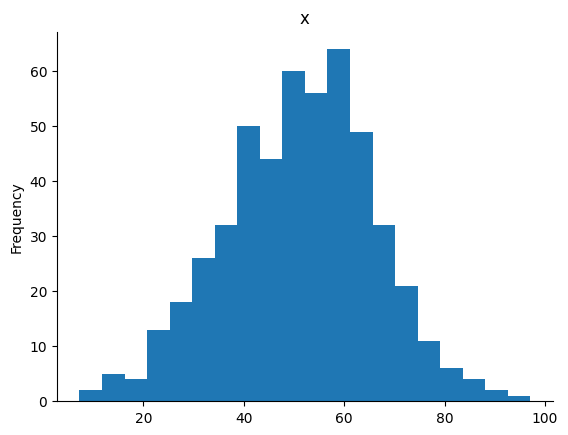

In [140]:
# гистограмма распределения x

from matplotlib import pyplot as plt
df1['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

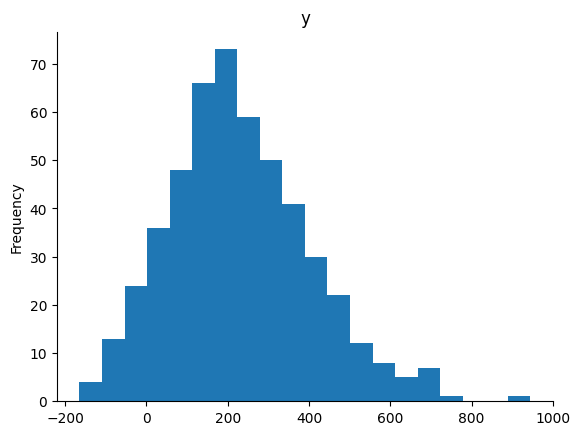

In [141]:
# гистограмма распределения y

df1['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

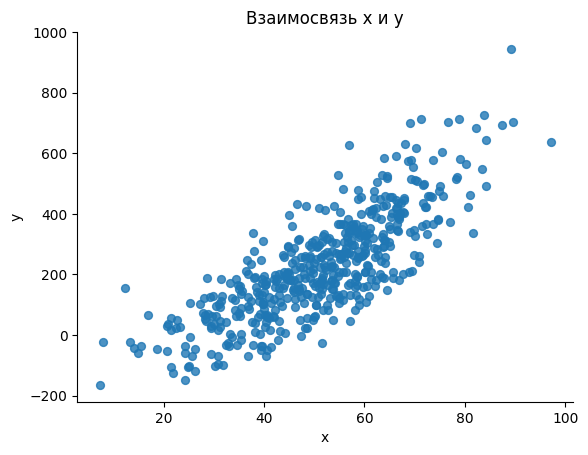

In [142]:
# Построим диаграму рассеяния

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='x', y='y', s=32, alpha=.8, title='Взаимосвязь x и y')
plt.gca().spines[['top', 'right',]].set_visible(False)

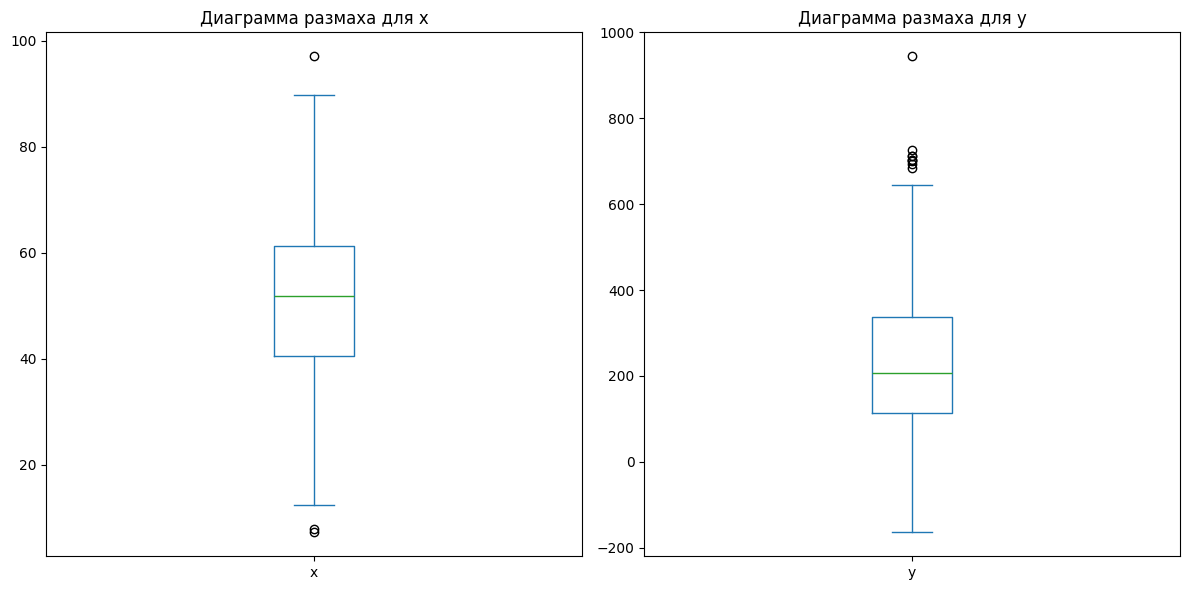

In [143]:
# Построение отдельных ящиков с усами для каждого столбца
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, column in enumerate(df1.columns):
    df1[column].plot(kind='box', ax=axes[i])
    axes[i].set_title(f'Диаграмма размаха для {column}')

plt.tight_layout()
plt.show()

In [144]:
# КРИТЕРИЙ 2

# расчет коэффициента Пирсона

# расчет t-критерия

# вывод о степени корреляции величин и статистической значимости их взаимосвязи


Обе переменные количественные, переменные визуально распределены нормально, отношение линейное, поэтому применим корелляцию Пирсона



In [145]:
# 1. Расчет коэффициента корреляции Пирсона
corr_xy = stats.pearsonr(df1['x'], df1['y'])

print("Корреляция между x и y:")
print(f"Коэффициент корреляции: {corr_xy[0]:.4f}")
print(f"P-value: {corr_xy[1]:.4f}")

# 2. Расчет t-критерия
def t_stat(r, n):
    return r * np.sqrt((n-2)/(1-r**2))

n = len(df1)
t_xy = t_stat(corr_xy[0], n)

# Критическое значение t для α=0.05
t_crit = stats.t.ppf(0.975, n-2)

print("\nT-статистика:")
print(f"x1-y: {t_xy:.4f}")
print(f"Критическое значение t: ±{t_crit:.4f}")

print("\nВывод:")
print("Корреляция x-y:")
if abs(corr_xy[0]) > 0.7:
    strength = "сильная"
elif abs(corr_xy[0]) > 0.3:
    strength = "средняя"
else:
    strength = "слабая"
print(f"- {strength} ({corr_xy[0]:.4f})")
print(f"- Статистически {'значима' if corr_xy[1] < 0.05 else 'незначима'}")



Корреляция между x и y:
Коэффициент корреляции: 0.8032
P-value: 0.0000

T-статистика:
x1-y: 30.0921
Критическое значение t: ±1.9647

Вывод:
Корреляция x-y:
- сильная (0.8032)
- Статистически значима


Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [146]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа

# построение гистограмм распределения

# построение "ящика с усами" для изучения выбросов

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков


In [147]:
# КРИТЕРИЙ 4

# расчет коэффициента Спирмена

# расчет t-критерия

# вывод о степени корреляции величин и статистической значимости их взаимосвязи


In [148]:
# Преобразование URL Google Drive для скачивания
file2_url = 'https://drive.google.com/file/d/1G7U2uPzakl6GF9j9hJlkBi18yF1b5WzR/view?usp=sharing'
file2_id = file2_url.split('/')[-2]
file2_url = f'https://drive.google.com/uc?id={file2_id}'

# Считывание файла с указанием разделителя
try:
    df2 = pd.read_csv(file2_url, sep=',')
except pd.errors.ParserError:
    try:
        df2 = pd.read_csv(file2_url, sep=';')
    except pd.errors.ParserError:
        df2 = pd.read_csv(file2_url, sep='\t')

print(df2.info())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
None
                  x           y
count  5.000000e+02  500.000000
mean   2.937425e-01   31.194583
std    5.122910e-01   12.963704
min    4.782025e-09    7.326924
25%    7.290016e-03   23.306428
50%    8.546016e-02   29.609966
75%    3.439475e-01   36.404294
max    4.210865e+00  157.834224


Все элементы являются численного типа.


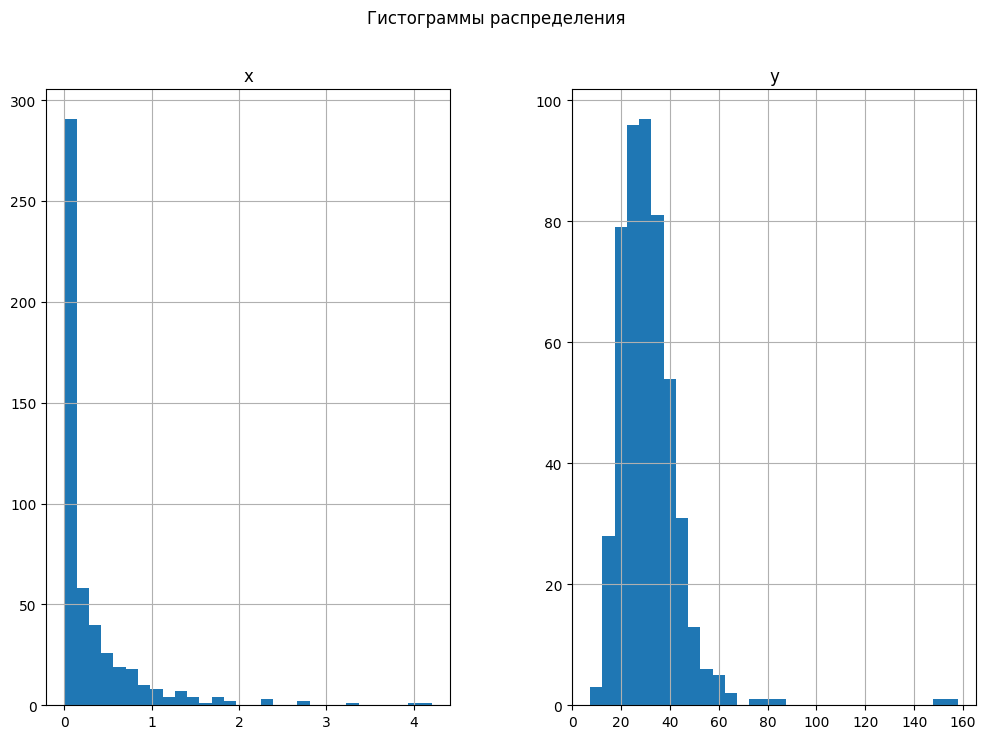

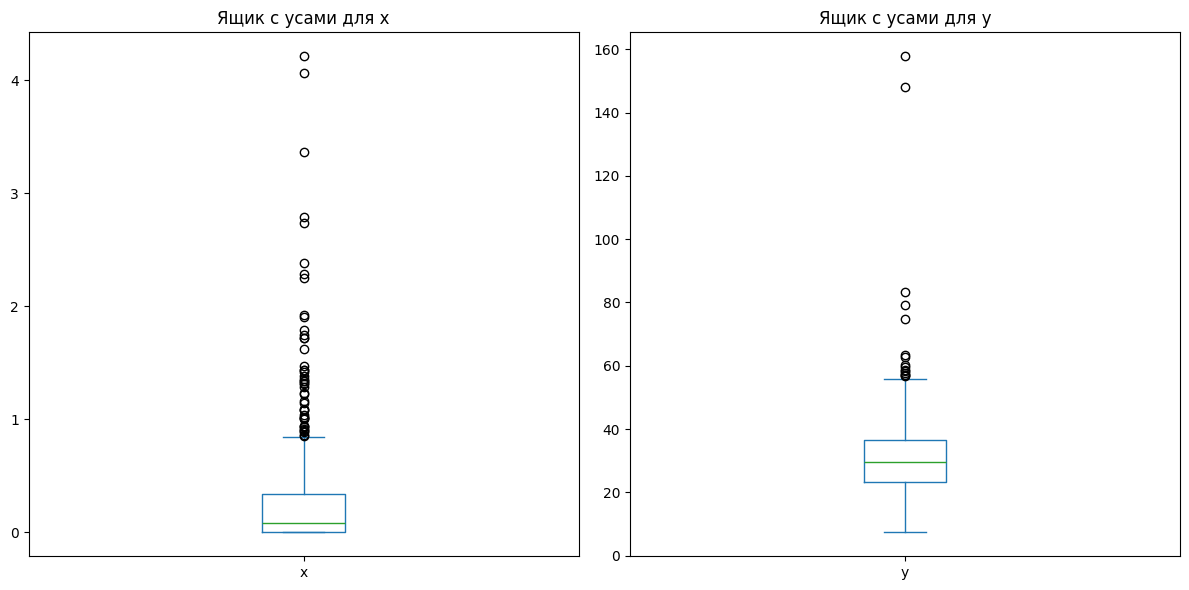

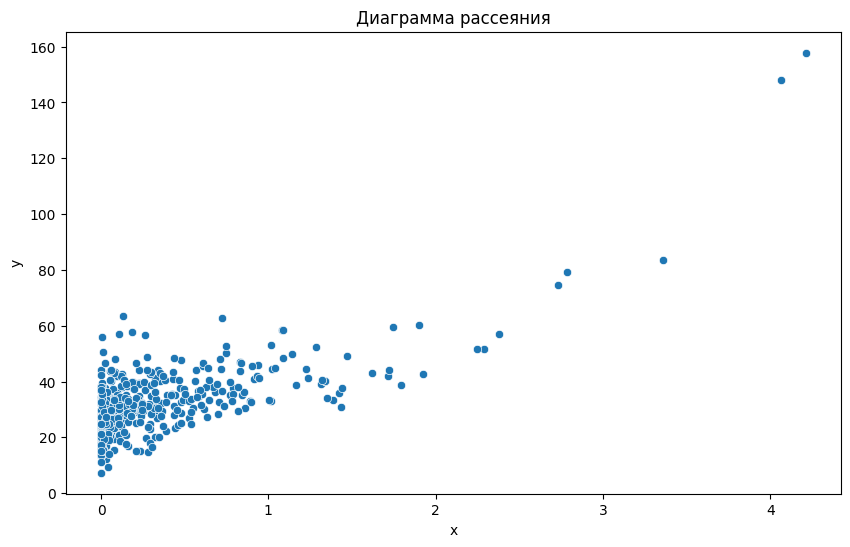


Проверка на нормальность распределения:
P-value для x: 0.0000
P-value для y: 0.0000

Распределение не является нормальным, рекомендуется использовать корреляцию Спирмена.

Корреляция Спирмена:
          x         y
x  1.000000  0.617087
y  0.617087  1.000000

T-статистика для корреляции Спирмена:
x-y: 17.5002
Критическое значение t: ±1.9647

Вывод о степени корреляции и статистической значимости:
- Степень корреляции: средняя (0.6171)
- Статистически значима


In [149]:
# Проверка, что все элементы - численного типа
if df2.map(np.isreal).all().all():
    print("Все элементы являются численного типа.")
else:
    print("Не все элементы являются численного типа.")

# Построение гистограмм распределения
df2.hist(bins=30, figsize=(12, 8))
plt.suptitle('Гистограммы распределения')
plt.show()

# Построение "ящика с усами" для изучения выбросов
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, column in enumerate(df2.columns):
    df2[column].plot(kind='box', ax=axes[i])
    axes[i].set_title(f'Ящик с усами для {column}')

plt.tight_layout()
plt.show()

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2.columns[0], y=df2.columns[1], data=df2)
plt.title('Диаграмма рассеяния')
plt.show()

# Вывод о целесообразности использования корреляции Спирмена
# Проверка на нормальность распределения
_, p_value_x = stats.shapiro(df2.iloc[:, 0])
_, p_value_y = stats.shapiro(df2.iloc[:, 1])

print("\nПроверка на нормальность распределения:")
print(f"P-value для {df2.columns[0]}: {p_value_x:.4f}")
print(f"P-value для {df2.columns[1]}: {p_value_y:.4f}")

if p_value_x < 0.05 or p_value_y < 0.05:
    print("\nРаспределение не является нормальным, рекомендуется использовать корреляцию Спирмена.")
else:
    print("\nРаспределение является нормальным, можно использовать корреляцию Пирсона.")

# Расчет корреляции Спирмена
corr_spearman = df2.corr(method='spearman')
print("\nКорреляция Спирмена:")
print(corr_spearman)

# Расчет t-критерия для корреляции Спирмена
def t_stat_spearman(r, n):
    return r * np.sqrt((n-2)/(1-r**2))

n = len(df2)
r_spearman = corr_spearman.iloc[0, 1]
t_spearman = t_stat_spearman(r_spearman, n)

# Критическое значение t для α=0.05
t_crit = stats.t.ppf(0.975, n-2)

print("\nT-статистика для корреляции Спирмена:")
print(f"x-y: {t_spearman:.4f}")
print(f"Критическое значение t: ±{t_crit:.4f}")

print("\nВывод о степени корреляции и статистической значимости:")
if abs(r_spearman) > 0.7:
    strength = "сильная"
elif abs(r_spearman) > 0.3:
    strength = "средняя"
else:
    strength = "слабая"
print(f"- Степень корреляции: {strength} ({r_spearman:.4f})")
print(f"- Статистически {'значима' if abs(t_spearman) > t_crit else 'незначима'}")

Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

---



In [150]:
file3_url = 'https://drive.google.com/file/d/1rqHYnNIXMPiYVhcfCOTFfdJtQomNZ27i/view'
file3_id = file3_url.split('/')[-2]
file3_url = f'https://drive.google.com/uc?id={file3_id}'

# Считывание файла с указанием разделителя
try:
    df3 = pd.read_csv(file3_url, sep=',')
except pd.errors.ParserError:
    try:
        df3 = pd.read_csv(file3_url, sep=';')
    except pd.errors.ParserError:
        df3 = pd.read_csv(file3_url, sep='\t')

print(df3.info())
print(df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes
None
               x          y
count  20.000000  20.000000
mean    0.660430   4.195928
std     3.950617   9.380405
min    -4.759558 -16.409053
25%    -2.118782  -1.932026
50%    -0.605184   6.919900
75%     3.357582  11.086537
max     9.389102  17.558549


In [151]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Пирсона

# расчет коэффициента Пирсона


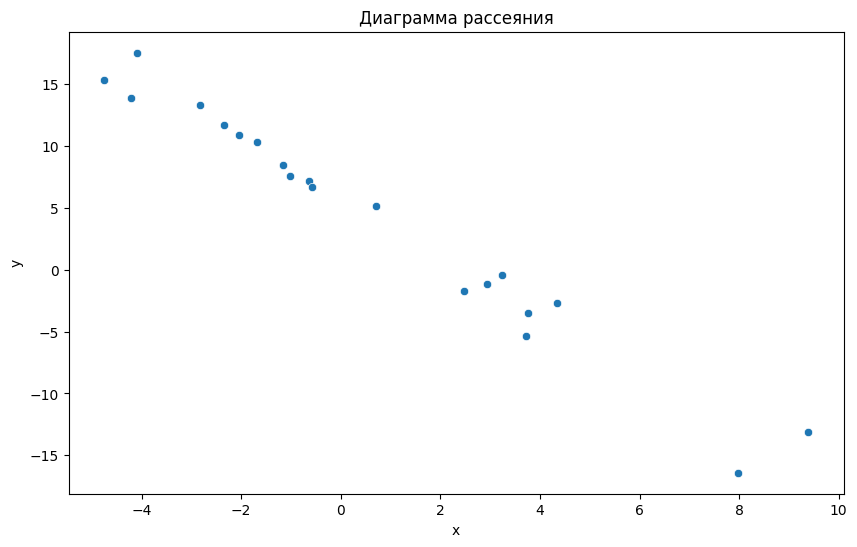


Проверка на нормальность распределения:
P-value для x: 0.2247
P-value для y: 0.2640

Распределение является нормальным, можно использовать корреляцию Пирсона.

Корреляция Пирсона:
          x         y
x  1.000000 -0.985142
y -0.985142  1.000000


In [152]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df3.columns[0], y=df3.columns[1], data=df3)
plt.title('Диаграмма рассеяния')
plt.show()

# Вывод о целесообразности использования корреляции Пирсона
# Проверка на нормальность распределения
_, p_value_x = stats.shapiro(df3.iloc[:, 0])
_, p_value_y = stats.shapiro(df3.iloc[:, 1])

print("\nПроверка на нормальность распределения:")
print(f"P-value для {df3.columns[0]}: {p_value_x:.4f}")
print(f"P-value для {df3.columns[1]}: {p_value_y:.4f}")

if p_value_x < 0.05 or p_value_y < 0.05:
    print("\nРаспределение не является нормальным, рекомендуется использовать корреляцию Спирмена.")
else:
    print("\nРаспределение является нормальным, можно использовать корреляцию Пирсона.")

# Расчет коэффициента корреляции Пирсона
corr_pearson = df3.corr(method='pearson')
print("\nКорреляция Пирсона:")
print(corr_pearson)


In [153]:
# КРИТЕРИЙ 6

# расчет коэффициентов линейной регрессии

# построение диаграммы рассеяния прогнозных и реальных значений на одном графике

Коэффициенты модели - const: 5.740762449346207, x: -2.339135741114135
Уравнение линейной регрессии: y = 5.740762449346207  -2.339135741114135*x


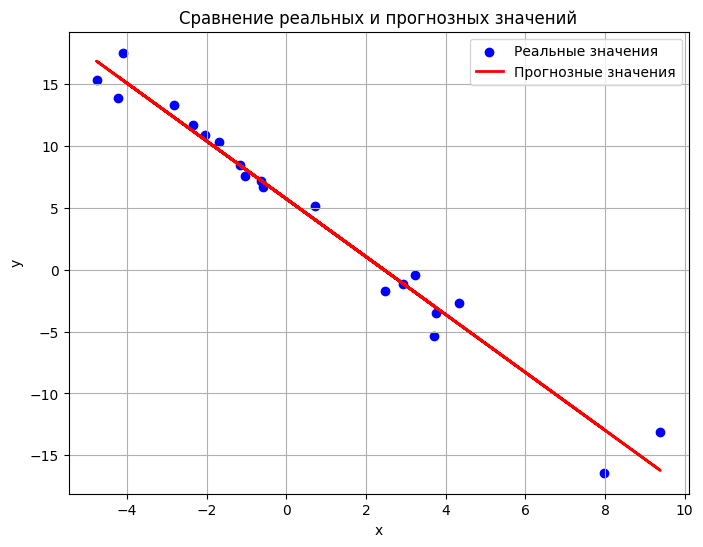

In [154]:
X = sm.add_constant(df3['x'])
model = sm.OLS(df3['y'], X).fit()
print(f'Коэффициенты модели - const: {model.params.iloc[0]}, x: {model.params.iloc[1]}')
print(f'Уравнение линейной регрессии: y = {model.params.iloc[0]}  {model.params.iloc[1]}*x')

plt.figure(figsize=(8, 6))
plt.scatter(df3['x'], df3['y'], color='blue', label='Реальные значения')
plt.plot(df3['x'], model.predict(X), color='red', label='Прогнозные значения', linewidth=2)
plt.title('Сравнение реальных и прогнозных значений')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [155]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации


In [156]:
# Расчет средней ошибки аппроксимации
y_pred = model.predict(X)
mae = np.mean(np.abs(df3.iloc[:, 1] - y_pred))
print(f"\nСредняя ошибка аппроксимации: {mae:.4f}")


Средняя ошибка аппроксимации: 1.2183


In [157]:
# КРИТЕРИЙ 8

# расчет F-критерия

# вывод о статистической значимости уравнения в целом


In [158]:
# Расчет F-критерия
f_stat = model.fvalue
f_pvalue = model.f_pvalue
print(f"\nF-критерий: {f_stat:.4f}")
print(f"P-value для F-критерия: {f_pvalue:.4f}")

if f_pvalue < 0.05:
    print("\nУравнение регрессии статистически значимо")
else:
    print("\nУравнение регрессии статистически не значимо.")


F-критерий: 592.2591
P-value для F-критерия: 0.0000

Уравнение регрессии статистически значимо


In [159]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции

# вывод о статистической значимости коэффициентов регрессии

# запись диапазона коэффицентов регрессии


In [160]:
# Расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции
se_b0 = model.bse[0]
se_b1 = model.bse[1]
se_corr = np.sqrt((1 - corr_pearson.iloc[0, 1]**2) / (len(df3) - 2))

print(f"\nСтандартная ошибка для b0: {se_b0:.4f}")
print(f"Стандартная ошибка для b1: {se_b1:.4f}")
print(f"Стандартная ошибка для коэффициента корреляции: {se_corr:.4f}")

# Расчет t-критерия коэффициентов регрессии и коэффициента корреляции
t_b0 = model.tvalues[0]
t_b1 = model.tvalues[1]
t_corr = corr_pearson.iloc[0, 1] / se_corr

print(f"\nt-критерий для b0: {t_b0:.4f}")
print(f"t-критерий для b1: {t_b1:.4f}")
print(f"t-критерий для коэффициента корреляции: {t_corr:.4f}")

# Вывод о статистической значимости коэффициентов регрессии
if abs(t_b0) > stats.t.ppf(0.975, len(df3) - 2):
    print("\nКоэффициент b0 статистически значим.")
else:
    print("\nКоэффициент b0 статистически не значим.")

if abs(t_b1) > stats.t.ppf(0.975, len(df3) - 2):
    print("Коэффициент b1 статистически значим.")
else:
    print("Коэффициент b1 статистически не значим.")

# Запись диапазона коэффициентов регрессии
b0_ci = model.conf_int().iloc[0]
b1_ci = model.conf_int().iloc[1]

print(f"\nДиапазон для b0: {b0_ci[0]:.4f} - {b0_ci[1]:.4f}")
print(f"Диапазон для b1: {b1_ci[0]:.4f} - {b1_ci[1]:.4f}")


Стандартная ошибка для b0: 0.3755
Стандартная ошибка для b1: 0.0961
Стандартная ошибка для коэффициента корреляции: 0.0405

t-критерий для b0: 15.2879
t-критерий для b1: -24.3364
t-критерий для коэффициента корреляции: -24.3364

Коэффициент b0 статистически значим.
Коэффициент b1 статистически значим.

Диапазон для b0: 4.9518 - 6.5297
Диапазон для b1: -2.5411 - -2.1372


<ipython-input-160-ced89df78c05>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_b0 = model.bse[0]
<ipython-input-160-ced89df78c05>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_b1 = model.bse[1]
<ipython-input-160-ced89df78c05>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_b0 = model.tvalues[0]
<ipython-input-160-ced89df78c05>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a futur

In [161]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6

In [162]:
# Предсказание для x0 = 6
x0 = 6

# Точечный прогноз
y_pred_x0 = model.params.iloc[0] + model.params.iloc[1] * x0

# Стандартная ошибка прогноза
X_mean = df3['x'].mean()
n = len(df3)
std_error = np.sqrt(model.mse_resid)
se_pred = std_error * np.sqrt(1 + 1/n + (x0 - X_mean)**2 / np.sum((df3['x'] - X_mean)**2))

# Доверительный интервал прогноза
t_crit = stats.t.ppf(0.975, n-2)
y_interval = (y_pred_x0 - t_crit * se_pred, y_pred_x0 + t_crit * se_pred)

print(f"Прогноз для x = {x0}:")
print(f"Точечная оценка y: {y_pred_x0:.4f}")
print(f"Доверительный интервал: ({y_interval[0]:.4f}, {y_interval[1]:.4f})")

Прогноз для x = 6:
Точечная оценка y: -8.2941
Доверительный интервал: (-12.0169, -4.5712)


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

Возникли некоторые проблемы со считыванием информации из файла, поэтому сделаем небольшой костыль для его чтения

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
# считывание файла
file_path = '/content/drive/My Drive/ex4.csv'

# Считывание файла
df4 = pd.read_csv(file_path)
df4

,x1,x2,y
0,13.637973,12.069977,-9.893143
1,-6.443507,23.970769,137.003862
2,9.361274,14.760979,20.571415
3,1.619709,24.043092,93.407384
4,-1.050608,21.837863,95.041511
5,9.395217,21.831347,41.765421
6,0.688195,10.526957,42.816414
7,-2.805982,25.806484,120.682713
8,9.942228,24.724110,52.673352
9,7.774614,19.247490,43.682796


In [165]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)

# вывод о корректности использования модели множественной регрессии

# расчет коэффициентов корреляции

# вывод о необходимости устранения какого-либо фактора


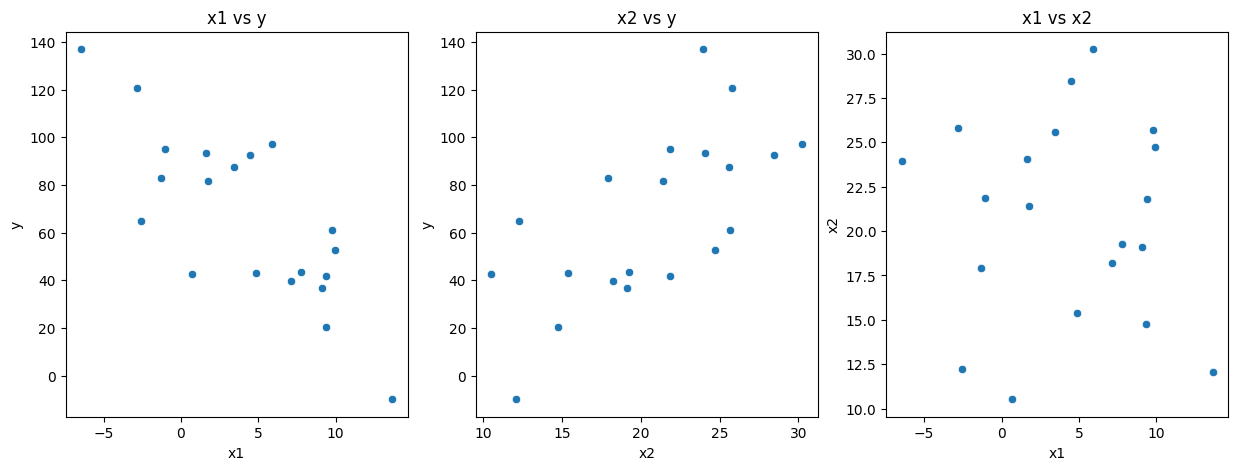


Матрица корреляции:
          x1        x2         y
x1  1.000000 -0.075013 -0.787807
x2 -0.075013  1.000000  0.669834
y  -0.787807  0.669834  1.000000


In [166]:
# Построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='x1', y='y', data=df4)
plt.title('x1 vs y')

plt.subplot(1, 3, 2)
sns.scatterplot(x='x2', y='y', data=df4)
plt.title('x2 vs y')

plt.subplot(1, 3, 3)
sns.scatterplot(x='x1', y='x2', data=df4)
plt.title('x1 vs x2')

plt.show()

# Расчет коэффициентов корреляции
corr_matrix = df4.corr()
print("\nМатрица корреляции:")
print(corr_matrix)

Корелляция между признаками x1 и x2 низкая - оставим их оба
при этом признаки сильно кореллируют с y х1 - отрицательно, х2 - положительно

In [167]:
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии


In [168]:
X = df4[['x1', 'x2']]
y = df4['y']

X_std = (X - X.mean()) / X.std()
y_std = (y - y.mean()) / y.std()

model_standardized = sm.OLS(y_std, X_std).fit()
standardized_coefficients = model_standardized.params
print(f"Коэффициенты стандартной регрессии - '{model_standardized.params.index[0]}' : {model_standardized.params.iloc[0]}, '{model_standardized.params.index[1]}' : {model_standardized.params.iloc[1]}")

Коэффициенты стандартной регрессии - 'x1' : -0.7417345957390165, 'x2' : 0.6141944304545282


In [169]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии

# построение диаграмм рассеяния прогнозных и реальных значений на одном графике


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1993.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           6.90e-21
Time:                        17:39:42   Log-Likelihood:                -44.683
No. Observations:                  20   AIC:                             95.37
Df Residuals:                      17   BIC:                             98.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7221      2.223      3.024      0.0

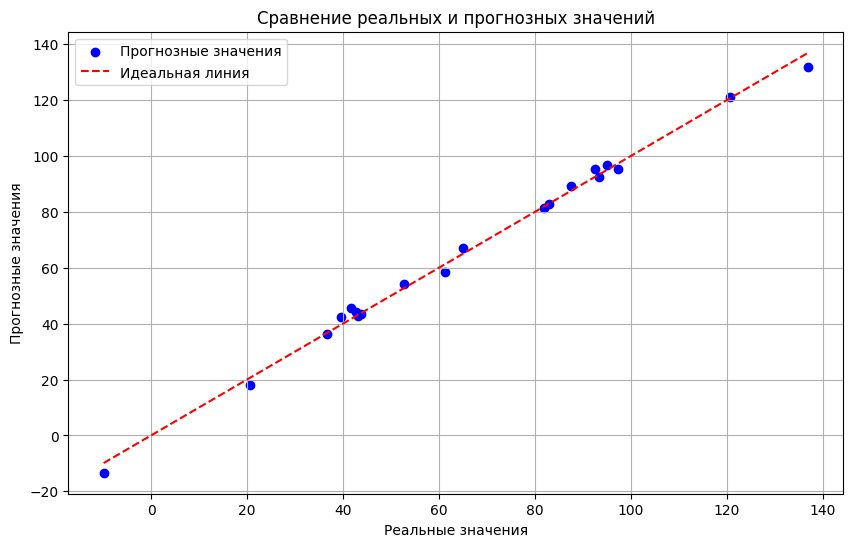

In [170]:

# Расчет коэффициентов "чистой" регрессии
X = df4[['x1', 'x2']]
X = sm.add_constant(X)  # Добавление константы для свободного члена
y = df4['y']

model = sm.OLS(y, X).fit()
print(model.summary())

# Получение коэффициентов регрессии
coefficients = model.params
print("\nКоэффициенты регрессии:")
print(coefficients)

# Прогнозные значения
y_pred = model.predict(X)

# Построение диаграммы рассеяния прогнозных и реальных значений
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Прогнозные значения')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Идеальная линия')
plt.title('Сравнение реальных и прогнозных значений')
plt.xlabel('Реальные значения')
plt.ylabel('Прогнозные значения')
plt.legend()
plt.grid()
plt.show()

In [171]:
# КРИТЕРИЙ 14

# расчет индекса множественной корреляции

# расчет F-критерия

# вывод о статистической значимости уравнения в целом

In [172]:
# Расчет индекса множественной корреляции (коэффициента детерминации R^2)
r_squared = model.rsquared
print(f"\nИндекс множественной корреляции (коэф. детерминации - R^2): {r_squared:.4f}")

# Расчет F-критерия
f_statistic = model.fvalue
f_pvalue = model.f_pvalue
print(f"\nF-критерий: {f_statistic:.4f}")
print(f"P-value для F-критерия: {f_pvalue:.4f}")

# Вывод о статистической значимости уравнения в целом
if f_pvalue < 0.05:
    print("\nУравнение регрессии статистически значимо в целом.")
else:
    print("\nУравнение регрессии статистически не значимо в целом.")


Индекс множественной корреляции (коэф. детерминации - R^2): 0.9958

F-критерий: 1992.6978
P-value для F-критерия: 0.0000

Уравнение регрессии статистически значимо в целом.


In [173]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике

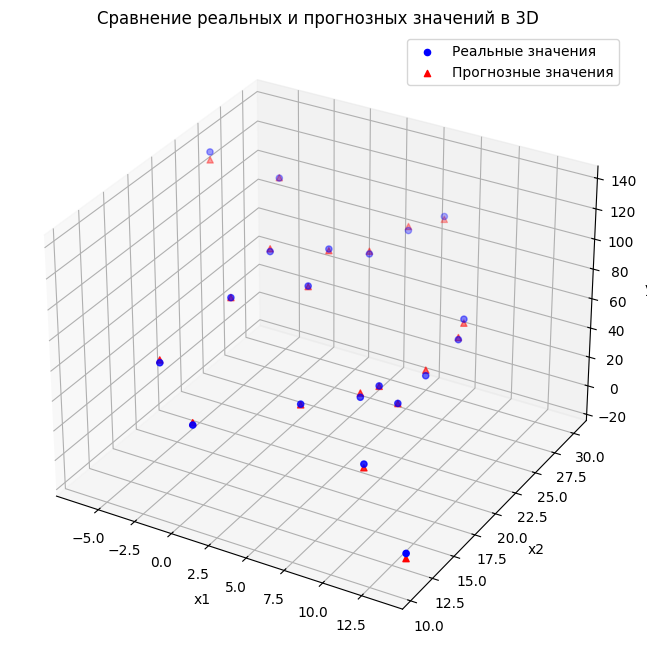

In [174]:
# Построение 3D-изображения прогнозных и реальных значений на одном графике
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Точки реальных значений
ax.scatter(df4['x1'], df4['x2'], y, c='blue', marker='o', label='Реальные значения')

# Точки прогнозных значений
ax.scatter(df4['x1'], df4['x2'], y_pred, c='red', marker='^', label='Прогнозные значения')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Сравнение реальных и прогнозных значений в 3D')
ax.legend()

plt.show()